<a href="https://colab.research.google.com/github/raspopovaa/Pet-Project-Data-Analyst/blob/main/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B7%D0%B0%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9%20%D0%B2%D0%BB%D0%B8%D1%8F%D1%8E%D1%89%D0%B8%D1%85%20%D0%BD%D0%B0%20%D1%83%D1%81%D0%BF%D0%B5%D1%88%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6%20%D0%B8%D0%B3%D1%80/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B7%D0%B0%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9_%D0%B2%D0%BB%D0%B8%D1%8F%D1%8E%D1%89%D0%B8%D1%85_%D0%BD%D0%B0_%D1%83%D1%81%D0%BF%D0%B5%D1%88%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6_%D0%B8%D0%B3%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import scipy.stats as st
from scipy.stats import levene
from scipy.stats import mannwhitneyu
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 100)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
cm = sns.light_palette("brown", as_cmap=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Чтение файла
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()
display(df.sample(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14210,Sabre Wulf,GBA,NaN,Platform,0.020,0.010,0.000,0.000,75.000,8,E
11517,Kenshuui Tendo Dokuta,DS,2004.000,Simulation,0.000,0.000,0.080,0.000,NaN,NaN,NaN
12675,Daito Giken Koushiki Pachi-Slot Simulator: Shi...,PS2,2008.000,Misc,0.000,0.000,0.060,0.000,NaN,NaN,NaN
5963,Jikkyou Powerful Pro Yakyuu 2000 Kaimakuban,PS,2000.000,Sports,0.000,0.000,0.270,0.020,NaN,NaN,NaN
1996,Sonic the Hedgehog,X360,2006.000,Platform,0.440,0.480,0.000,0.110,46.000,4.4,E10+


Есть пропуски в столбцах с наименованием,годом релиза, оценкой критиков, оценкой пользователей, рейтингом. У года релиза тип данных float, в пользовательском рейтинге встречается аббривеатура tbd

In [5]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
Name,0.010000
Platform,0.000000
Year_of_Release,1.610000
Genre,0.010000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.320000
User_Score,40.090000


% пропусков в наименовании, годе релиза и жанре - незначителен, можно такие строки удалить.

In [6]:
# Вывод описания колличественных признаков
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000,16715.000,16715.000,16715.000,16715.000,8137.000
mean,2006.485,0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,1980.000,0.000,0.000,0.000,0.000,13.000
25%,2003.000,0.000,0.000,0.000,0.000,60.000
50%,2007.000,0.080,0.020,0.000,0.010,71.000
75%,2010.000,0.240,0.110,0.040,0.030,79.000
max,2016.000,41.360,28.960,10.220,10.570,98.000


In [7]:
# Вывод описания категориальных признаков
df.describe(include=[object])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Мы видим большой % пропусков в оценках критиков и пользователей, рейтинге, есть нулевые значения продаж, самая частотная аббривеатура - tbd в пользовательской оценке, сам столбец с пользовательской оценкой в формате object, а оценка кртиков имеет формат float. Назавания столбцов нужно привести к нижнему регистру для удобства анализа.

## Подготовка данных

### Приведение названий столбцов к нижнему регистру

In [8]:
# Нижний регистр для наименований столбцов
df.columns = map(str.lower, df.columns)

In [9]:
df.sample(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7206,Tales of Graces,Wii,2009.000,Role-Playing,0.000,0.000,0.220,0.000,NaN,NaN,NaN


In [10]:
# Замена типа данных в year_of_release с float на int
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [11]:
# Обработка значения tbd и изменение типа данных в столбце с оценкой пользователя
df['user_score'] = df['user_score'].replace('tbd', 0, regex=True)
df['user_score'] = df['user_score'].astype('float64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


<br>Замена типа float на int в годе релиза логически вытекает из значений в годах.
<br>Замена типа данных с object на float в столбце с пользовательской оценкой необходима для приведения обоих столбцов с оценками к одному типу, что необходимо для последующего анализа данных. Аббривеатура tbd по открытым источникам расшифровывется в общем смысле как *To Be Determined* или *To Be Decided*. Т.е. в толковании применительно к представленным данным, оценка по играм с таким значением отцуствует либо не определена и будет определена в будущем. Оценка в столбце определена численно, т.е отсуствие оценки возможно заменить на значение 0, как логичное числовое значение отсутствия оценки.

### Обработка пропусков

In [13]:
# Вывод пропусков в столбце name
df.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.780,0.530,0.000,0.080,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.000,0.000,0.030,0.000,NaN,NaN,NaN


 В столбце year_of_release есть пропуски. Визуально оценим пропуски.

In [14]:
df.query('name == "FIFA Soccer 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.590,2.360,0.040,0.510,84.000,6.400,E
2606,FIFA Soccer 2004,XB,2003,Sports,0.240,0.490,0.000,0.050,82.000,8.200,E
12029,FIFA Soccer 2004,GC,2003,Sports,0.050,0.010,0.000,0.000,83.000,6.200,E
13086,FIFA Soccer 2004,GBA,2003,Sports,0.040,0.010,0.000,0.000,82.000,7.900,E


Мы видим, что пропуски можно заменить на год выпуска той же игры вышедшей на другой платформе. Напишем функцию заменяющую данные пропуски.

In [15]:
def not_nan(df, value, category):
    for type_unique in df[category].unique():
        df.loc[(df[value].isna())&(df[category] ==type_unique), value] = \
        df.loc[df[category] ==type_unique, value].max()
    return df

In [16]:
not_nan(df, 'year_of_release', 'name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.360,28.960,3.770,8.450,76.000,8.000,E
1,Super Mario Bros.,NES,1985,Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.680,12.760,3.790,3.290,82.000,8.300,E
3,Wii Sports Resort,Wii,2009,Sports,15.610,10.930,3.280,2.950,80.000,8.000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000,0.000,0.010,0.000,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.000,0.010,0.000,0.000,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000,0.000,0.010,0.000,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.010,0.000,0.000,0.000,NaN,NaN,NaN


In [17]:
df.query('name == "FIFA Soccer 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
377,FIFA Soccer 2004,PS2,2003,Sports,0.590,2.360,0.040,0.510,84.000,6.400,E
2606,FIFA Soccer 2004,XB,2003,Sports,0.240,0.490,0.000,0.050,82.000,8.200,E
12029,FIFA Soccer 2004,GC,2003,Sports,0.050,0.010,0.000,0.000,83.000,6.200,E
13086,FIFA Soccer 2004,GBA,2003,Sports,0.040,0.010,0.000,0.000,82.000,7.900,E


In [18]:
df.query('name == "Rock Band"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,<NA>,Misc,1.930,0.330,0.000,0.210,92.000,8.200,T
805,Rock Band,Wii,<NA>,Misc,1.330,0.560,0.000,0.200,80.000,6.300,T
1142,Rock Band,PS3,<NA>,Misc,0.990,0.410,0.000,0.220,92.000,8.400,T
1840,Rock Band,PS2,<NA>,Misc,0.710,0.060,0.000,0.350,82.000,6.800,T


Функция заменила пропуски, но не все. Остались пропуски где неизвестен год выхода игры на всех платформах. Заменить эти пропуски невозможно. Прелагаю удалить их. Их осталось 0,87%. Удалим пропуски и в других столбцах

In [19]:
# Удаление строк с  пропусками в наименования игры, жанре и годе релиза.
df.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

In [20]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('viridis_r')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.260000
user_score,40.040000


Мы привели названия столбцов в порядок, проверили строки на отсутствие полных дубликатов, удалили строки с пропусками в столбцах `name`, `year_of_release`, `genre` (там не более 2% пропусков, потеря для нашего исследования несущественная).

Исследуем более подробно пропуски в рейтингах

In [21]:
# Количество пропусков в оценках критиков, пользователей и рейтинге
print('Количество пропусков оценки критиков',(len(df.query('critic_score != critic_score', engine='python'))))
print('Количество пропусков оценки пользователей',(len(df.query('user_score != user_score', engine='python'))))
print('Количество пропусков рейтинга',(len(df.query('rating != rating', engine='python'))))

Количество пропусков оценки критиков 8492
Количество пропусков оценки пользователей 6633
Количество пропусков рейтинга 6699


In [22]:
len(df.query('user_score != user_score and rating != rating and critic_score != critic_score', engine='python'))

6555

В сэмплах данных с пропусками нет определенных закономерностей, разные платформы, разные года релизов. Возможно отметить только невысокие продажи в сэмплах строк, часто только в одном регионе. 6555 строки имеют пропуски в оценках и рейтинге одновременно. Причины пропусков могут быть обусловлены разными факторами. Даты релиза для разных платформ могут быть разные, оценки могут отсутсвовать в агрегаторах в силу года релиза или по другим причинам. Поскольку количество пропусков очень большое, возможно заменить их на технические индикаторы для возможности выделения при анализе:оценки критиков и пользователей - на 0, т.к. столбцы имеют колличественные данные.

In [23]:
# Заполнение пропусков техническими значениями
df['critic_score'].fillna(0, inplace=True)
df['user_score'].fillna(0, inplace=True)

In [24]:
# Проверка уникальных значений в рейтинге
df['rating'].unique().tolist()

['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP']

Столбец `rating` содержит буквенное обозначение рейтинга, присвоенного видеоигре организацией ESRB (всего 8 уникальных значений + пропуски).

Справочная информация (источник - https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board):  
**Entertainment Software Rating Board (ESRB)** — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.  

Расшифровка буквенных обозначений рейтинга:  
«EC» («Early childhood») — «Для детей младшего возраста»  
«E» («Everyone») — «Для всех» (до 1998 года - "K-A" ("Kids to Adults"))  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
«T» («Teen») — «Подросткам»  
«M» («Mature») — «Для взрослых»  
«AO» («Adults Only 18+») — «Только для взрослых»  
«RP» («Rating Pending») — «Рейтинг ожидается»

В других странах существуют свои системы стандартизации и лицензирования видеоигр (например, как PEGI в Европейском Союзе, CERA в Японии). Отсутствие рейтинга в датасете может обозначать, что игра была произведена за переделами Северной Америки и не подлежала оценке ESRB. Мы можем заменить NaN на 0, чтобы заполнить пропуски.

In [25]:
# Замена пропусков в рейтинге на нулевое значение
df['rating'].fillna(0, inplace=True)

In [26]:
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('viridis_r')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,0.000000
user_score,0.000000


### Добавление столбца с общими продажами

In [27]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360,28.960,3.770,8.450,76.000,8.000,E,82.540
1,Super Mario Bros.,NES,1985,Platform,29.080,3.580,6.810,0.770,0.000,0.000,0,40.240
2,Mario Kart Wii,Wii,2008,Racing,15.680,12.760,3.790,3.290,82.000,8.300,E,35.520
3,Wii Sports Resort,Wii,2009,Sports,15.610,10.930,3.280,2.950,80.000,8.000,E,32.770
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270,8.890,10.220,1.000,0.000,0.000,0,31.380
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000,0.000,0.010,0.000,0.000,0.000,0,0.010
16711,LMA Manager 2007,X360,2006,Sports,0.000,0.010,0.000,0.000,0.000,0.000,0,0.010
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000,0.000,0.010,0.000,0.000,0.000,0,0.010
16713,Spirits & Spells,GBA,2003,Platform,0.010,0.000,0.000,0.000,0.000,0.000,0,0.010


Итак, мы подготовили данные к работе: избавились от пропусков и артефактов, изменили тип данных, убедились в отсутствии дубликатов, привели названия столбцов к удобному виду. Дополнительно расчитали для каждой игры суммарные продажи по всем регионам. 

Переходим к исследованию!

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [28]:
games_stat = df.groupby('year_of_release')[['total_sales', 'name']].agg({'total_sales': 'sum', 'name': 'count'})
games_stat.columns = ['total_sales', 'games_released']
trace0 = go.Scatter(
    x=games_stat.index,
    y=games_stat.total_sales,
    name='Значение общих продаж, млн шт.'
)

trace1 = go.Scatter(
    x=games_stat.index,
    y=games_stat.games_released,
    name='Количество выпущенных игр'
)

data = [trace0, trace1]
layout = {'title': 'Выпуск видео игр с 1980 по 2016 года'}

fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

С 1980 по 1990 выпускалось и продавалось очень мало игр. В 90-е годы индустрия игр для ПК и игровых консолей начала развиваться, активный рост наблюдался в начале 2000х годов. Бум развития игровой индустрии пришелся на 2008-2009 годы - в это время было произведено и реализовано максимальное количество игр, продажи по всему миру превысили 650 млн копий в год. Начиная с 2009 года объем выпуска и объем продаж неуклонно снижаются. 

По данным портала Stopgame.ru (https://stopgame.ru/newsdata/41236) в 2019 году 46% рынка занимали игры для мобильных устройств (смартфонов и планшетов). Данные об этих платформах отсутствуют в нашем датасете - предполагаем, что именно их стремительное развитие и завоевание существенной доли рынка обусловило снижение продаж игр для консолей и ПК после 2009 года.

Посмотрим динамику продаж по макрорегионам

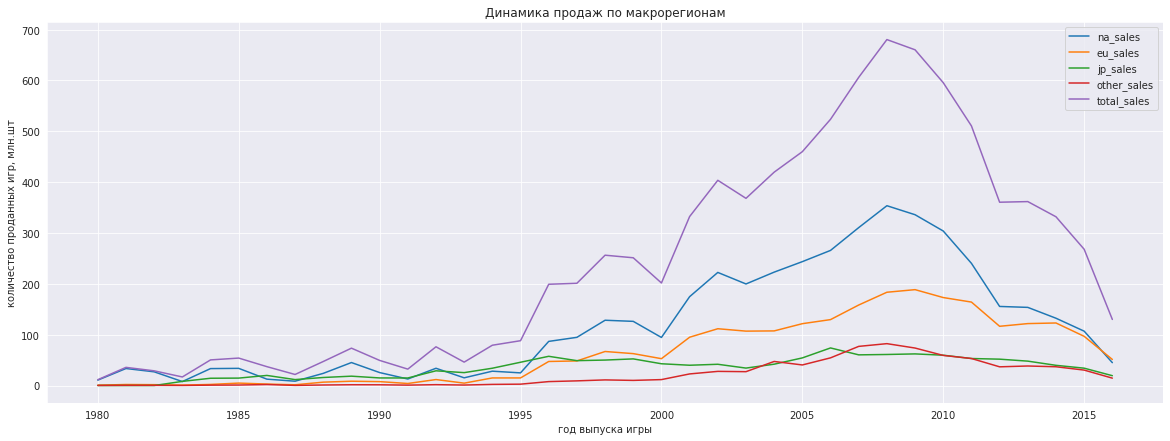

In [29]:
#Агрегируем данные и посмотрим на динамику продаж в макрорегиионах
sales = df[[x for x in df.columns if 'sales' in x] + ['year_of_release']]
sales.groupby('year_of_release').sum().plot(figsize=(20,7))
plt.title('Динамика продаж по макрорегионам')
plt.xlabel('год выпуска игры')
plt.ylabel('количество проданных игр, млн.шт');

На графике выше представлена динамика объема продаж компьютерных игр по регионам и в целом в мире. Мы видим, что основная доля продаж приходится на рынок Европы и Северной Америки. Для данных регионов характерен рост спроса на игры в первом десятилетии 21 века, и спад в 2009-2015 годах. В то же время доля Японии и других стран в общим объеме продаж незначительна и спрос практически стабилен на протяжении последних 15 лет. 

### Посмотрим, как менялись продажи по платформам. 

С 2009 года идет снижение показателей. Наша задача определить закономерности определяющие успешность игры. Для этого нам не нужны данные за весь период. Игра скорее всего не будет успешной, если выйдет на платформе из 1984 года. Определим временной период в котором будут находиться данные полезные нам.
Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы

In [30]:
# Расчет общих продаж по платформам
df_platforms = df.pivot_table(index=['platform'],values= 'total_sales', aggfunc='sum').sort_values(by='total_sales', ascending =False).reset_index()
df_platforms = df_platforms.loc[0:11]
df_platforms.style.background_gradient(cmap=cm)

,platform,total_sales
0,PS2,1247.160000
1,X360,966.610000
2,PS3,935.190000
3,Wii,903.310000
4,DS,804.280000
5,PS,727.580000
6,PS4,314.140000
7,GBA,313.730000
8,PSP,293.570000
9,PC,258.860000


In [31]:
# Группировка платформ с самыми большими продажами по годам
p = df_platforms['platform']
df1 = df.query('platform in @p').groupby(['platform', 'year_of_release'], as_index=False).agg({'total_sales': 'sum'})
df1

,platform,year_of_release,total_sales
0,3DS,2010,0.320
1,3DS,2011,63.200
2,3DS,2012,51.760
3,3DS,2013,56.570
4,3DS,2014,43.760
...,...,...,...
129,XB,2004,65.970
130,XB,2005,49.090
131,XB,2006,10.040
132,XB,2007,0.550


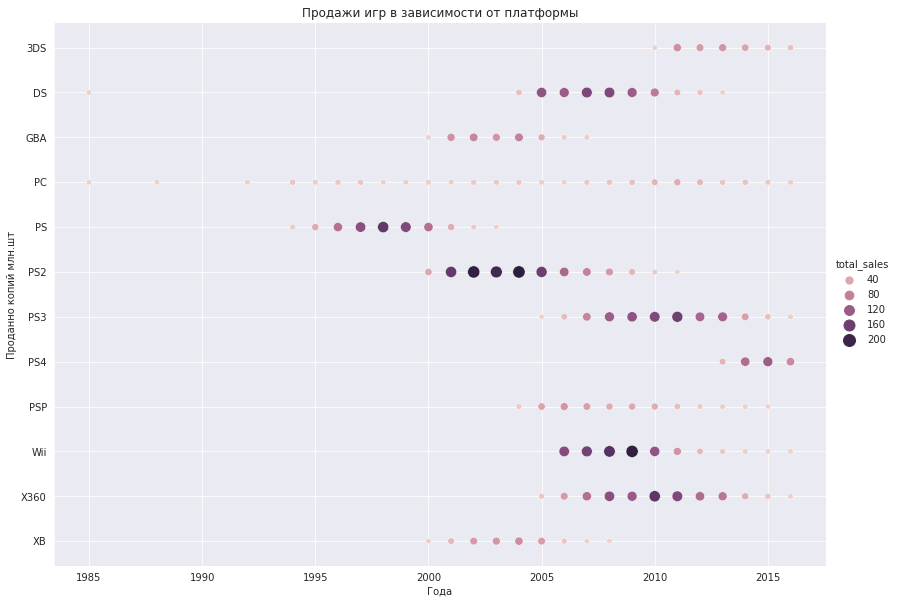

In [32]:
sns.relplot(data = df1, x="year_of_release", y="platform", hue="total_sales", size="total_sales", sizes=(30, 150),  height=8.27, aspect=11.7/8.27)
plt.title('Продажи игр в зависимости от платформы')
plt.xlabel('Года')
plt.ylabel('Проданно копий млн.шт')
plt.show()

На графике видим продажи игр по каждой платформе. Наблюдаем в основном нормальное распределение значений продаж. Видим, что из 12 платформ к 2016 году "остались в живых" только 6. Особняком среди них стоит PC, это платформа стабильно продает игры уже на протяжении 23 лет, но показатели продаж стабильно низкие.

In [33]:
#Сгруппируем данные и определим за какой характерный срок появляются новые и исчезают старые платформы.
z = df.pivot_table(values='year_of_release', index='platform', aggfunc=lambda x: len(x.unique())).median()
print('Медиана продолжительности жизни всех платформ', int(z[0]), 'лет')


Медиана продолжительности жизни всех платформ 7 лет


Для исключения возможных выбросов используем медиану показателей продолжительнойте жизни платформ. Пик продаж платформы = 7/2. Округлим до 4. Вывод: актуальный период исследования данных 4 года.
Возьмём данные за соответствующий актуальный период. Эти данные помогут построить прогноз на 2017 год.

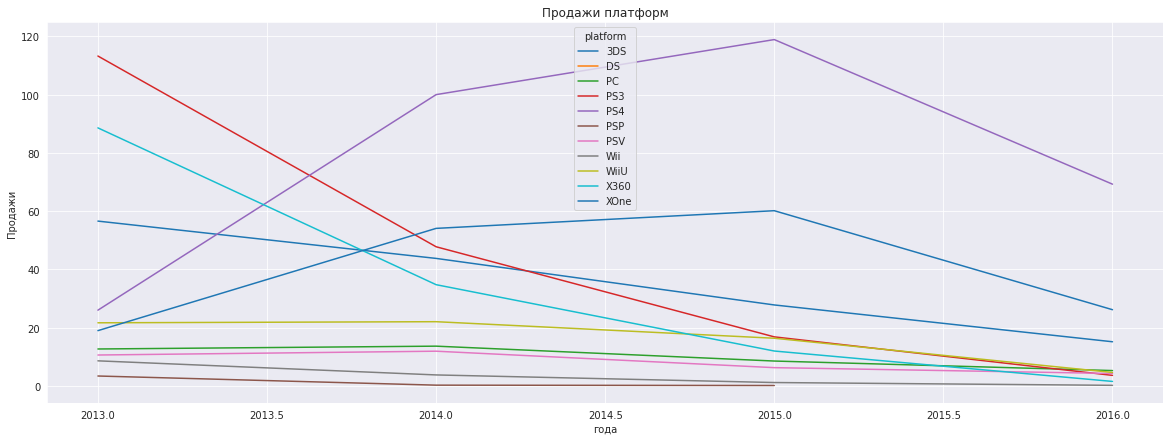

In [34]:
df_2012=df[df.year_of_release > 2012]
df_new = df_2012.pivot_table(index='year_of_release',
                             columns ='platform',
                             values='total_sales',
                             aggfunc='sum' )
df_new.plot(figsize=(20,7))
plt.title('Продажи платформ')
plt.xlabel('года')
plt.ylabel('Продажи')
plt.show()

Мы видим группу из 3-х платформ лидирующих в продажах как 2015 так и в 2016 годах: XOne, PS4, 3DS. Все платформы на ходятся на спаде продаж. Их жизненные циклы подходят к концу. Определим потенциально прибыльные платформы. Прежде всего, нужно определить термин "потенциально прибыльный". Будем считать, что это значит приносящий максимальную выручку. Т.Е. нам нужны платформы с максимальными продажами на 2016 год - XOne, PS4, 3DS.

In [35]:
#Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Есть ли выбросы?
df_box= df_2012.query('platform in ("XOne", "PS4", "3DS")').pivot_table(index=['name', 'platform', 'year_of_release'], values='total_sales').sort_values(by='platform').reset_index()
df_box

,name,platform,year_of_release,total_sales
0,Beyblade Burst,3DS,2016,0.030
1,Mario Party: Star Rush,3DS,2016,0.310
2,Mario Party: Island Tour,3DS,2013,1.920
3,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,3DS,2013,0.050
4,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016,0.530
...,...,...,...,...
937,Ryse: Son of Rome,XOne,2013,1.390
938,Rugby World Cup 2015,XOne,2015,0.020
939,Rugby League Live 3,XOne,2015,0.010
940,LEGO Marvel Super Heroes,XOne,2013,1.050


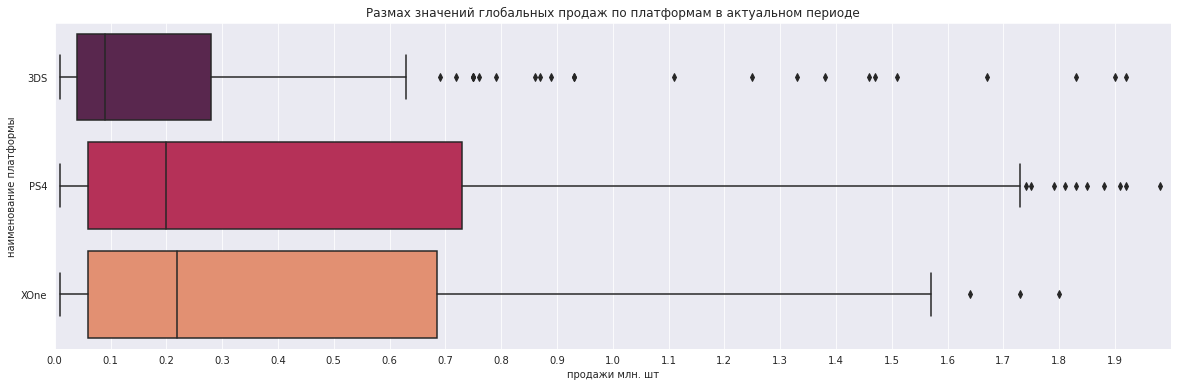

In [36]:
# Диаграмма размах по глобальным продажам в разрезе платформ
fig, ax = plt.subplots(figsize=(20,6))
sns.boxplot(y="platform", x='total_sales', data=df_box, orient='h', palette='rocket')
ax.set_xticks(np.arange(0,2,0.1))
plt.title('Размах значений глобальных продаж по платформам в актуальном периоде')
ax.set_xlabel('продажи млн. шт')
ax.set_ylabel('наименование платформы')
ax.set_xlim(0, 2)
plt.show()

В период с 2013 по 2016 самые высокие средние продажи были у игр, произведенных для платформ: 
- PS4 (год выпуска - 2013, производитель - Sony, max продажи - 118.9, медиана 84.6), 
- Xbox One (год выпуска - 2013, разработчик Microsoft, max продажи - 60.1, медиана 40.1) и 
- 3DS (год выпуска - 2011, производитель - Nintendo, max продажи - 56.6, медиана 35.8).

У явного лидера - PS4 - распределение смещено в сторону максимальных значений. Это самая популярная и успешная платформа: игры, созданные для нее, продавались большими тиражами.

На общем фоне выделяются также консоли
- PS3 (2006, Sony, max продажи 113.25) и
- XBox 360 (2005, Microsoft, max продажи 88.58).  
Однако у этих двух платформ медианное значение ниже, чем у тройки лидеров, а разброс значений достаточно большой. Медиана смещена в сторону меньших значений, значит как минимум половина игр для этих платформ продавалась хуже, чем для PS4, XOne и 3DS.

Продажи игр, разработанных для платформ DS (производитель - Nintendo, год выпуска - 2004), PSP (производитель - Sony, год выпуска - 2004), Wii (год выпуска - 2006, производитель - Nintendo), WiiU (2012 год), PC (персональный компьютер), PSV (2011 год) в последние 3 года не выходили за рамки 20 млн. копий в год. Эти платформы нельзя назвать прибыльными.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

In [37]:
df.year_of_release > 2012

0        False
1        False
2        False
3        False
4        False
         ...  
16710     True
16711    False
16712     True
16713    False
16714     True
Name: year_of_release, Length: 16567, dtype: boolean

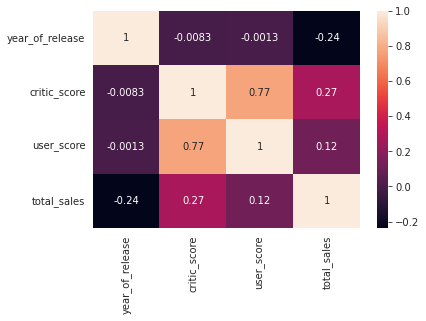

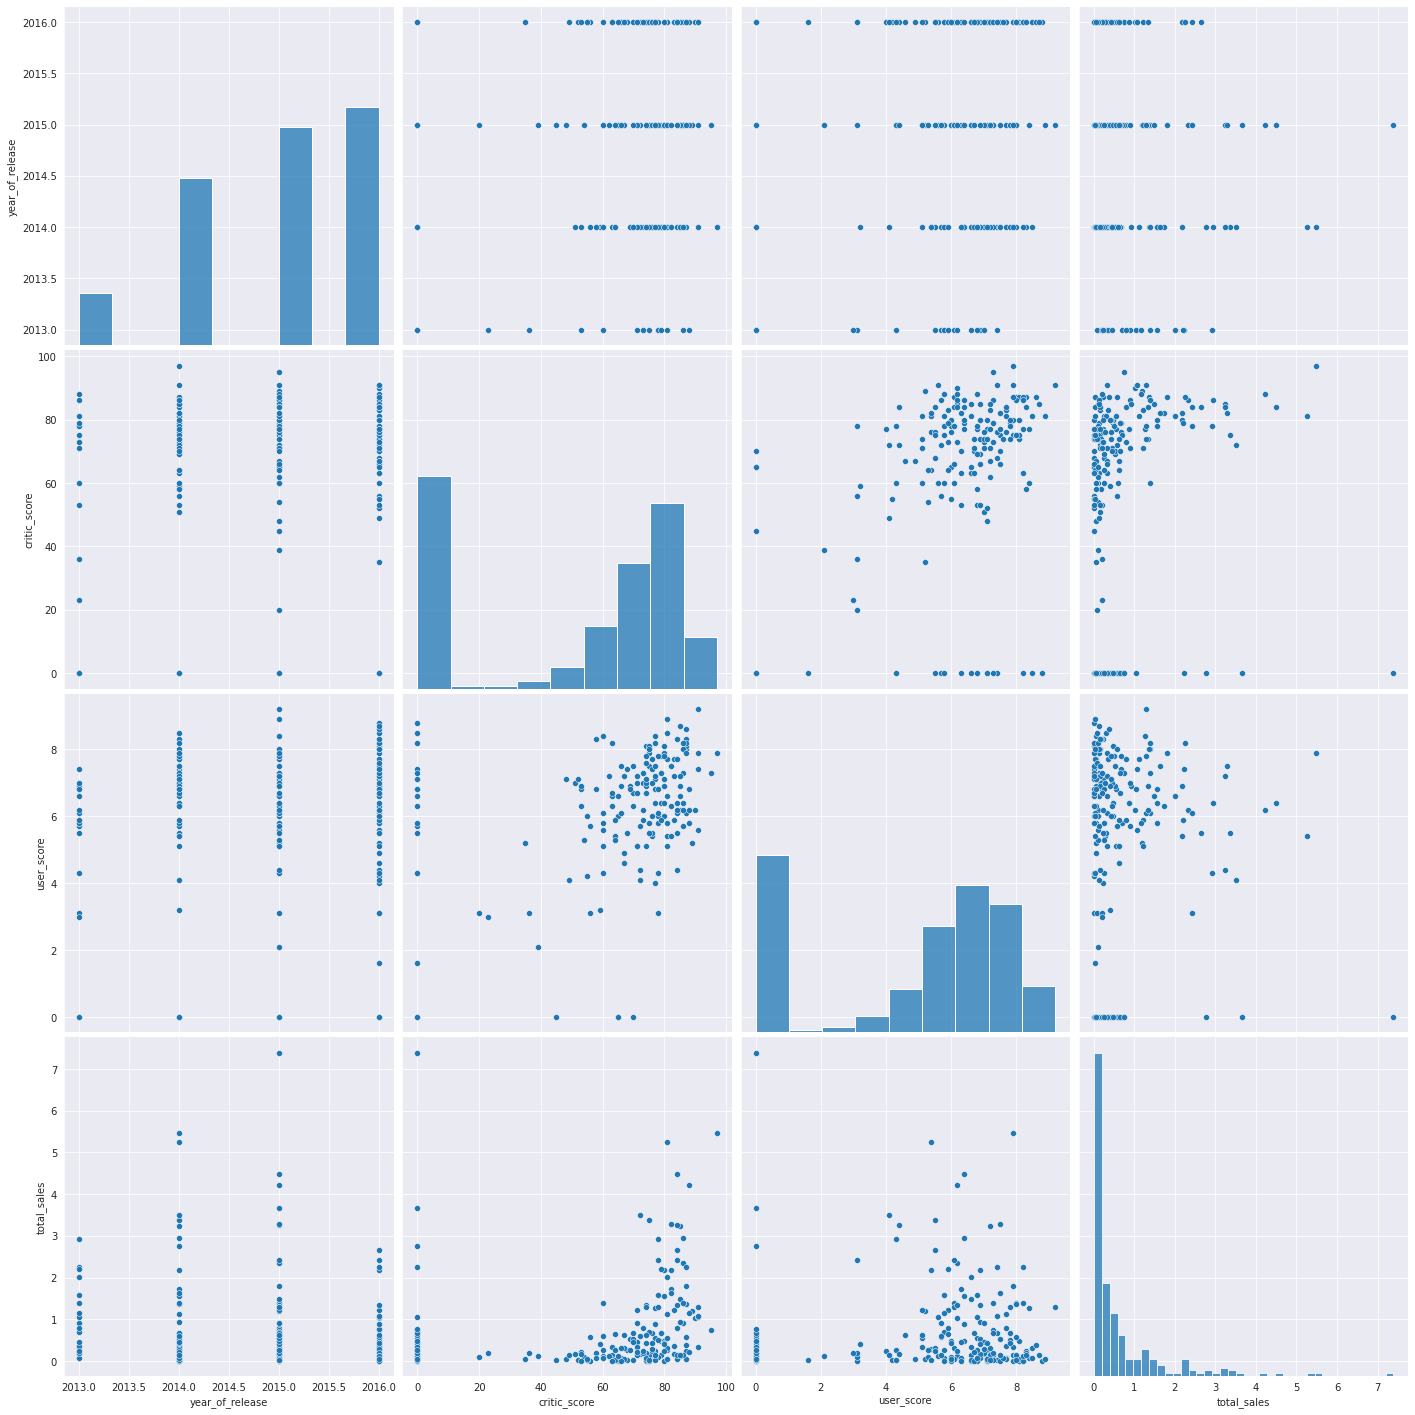

In [38]:
df_corr = df[df.year_of_release > 2012].query('platform in ("XOne")').pivot_table(index=['name', 'platform', 'year_of_release', 'critic_score' , 'user_score'], values='total_sales').sort_values(by='platform').reset_index()
corrMatrix = df_corr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
sns.pairplot(df_corr, height=5, aspect=1)
plt.show()

Явной взамосвязи нет. Продажи не зависят от оценок критиков и пользователей.

### Посмотрим на общее распределение игр по жанрам. 

In [39]:
df_genre = df[df.year_of_release > 2012].pivot_table(index=['genre'], values='total_sales', aggfunc=['count', 'sum', 'median']).sort_values(by=('count', 'total_sales'), ascending=False).reset_index()
df_genre.style.background_gradient(cmap='mako_r')

,genre,count,sum,median
,,total_sales,total_sales,total_sales
0,Action,769,322.500000,0.110000
1,Role-Playing,292,145.890000,0.125000
2,Adventure,245,23.640000,0.030000
3,Sports,214,150.650000,0.240000
4,Shooter,187,232.980000,0.450000
5,Misc,156,63.060000,0.105000
6,Racing,85,39.890000,0.120000
7,Fighting,80,35.310000,0.125000
8,Platform,74,42.630000,0.225000


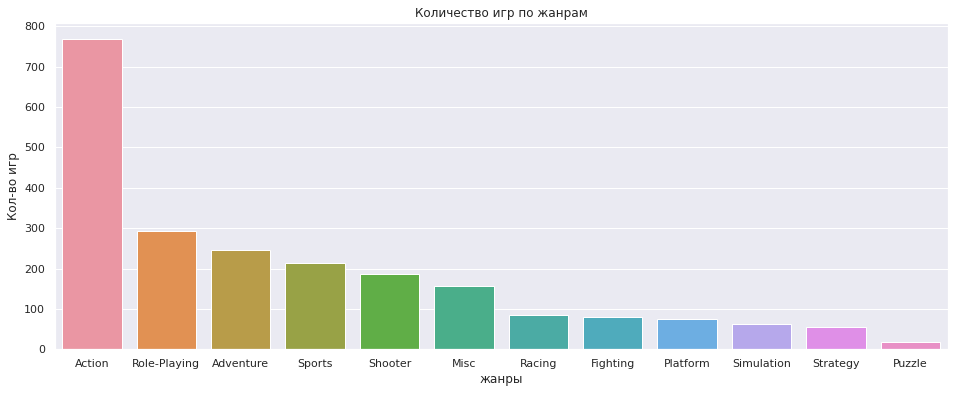

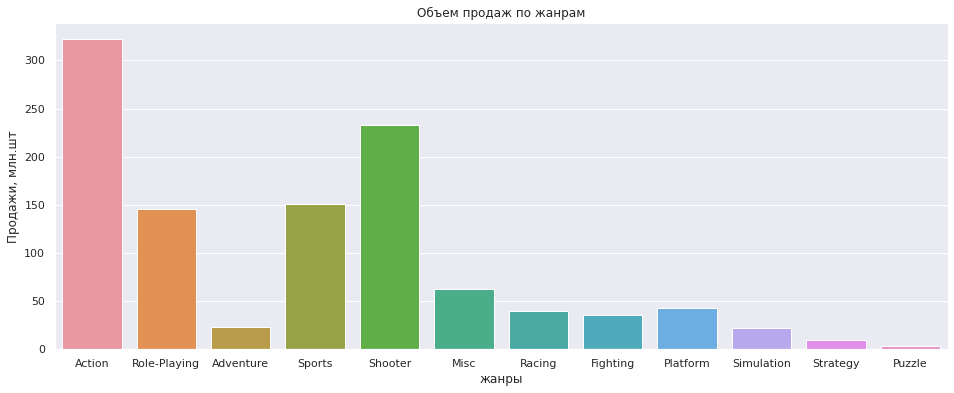

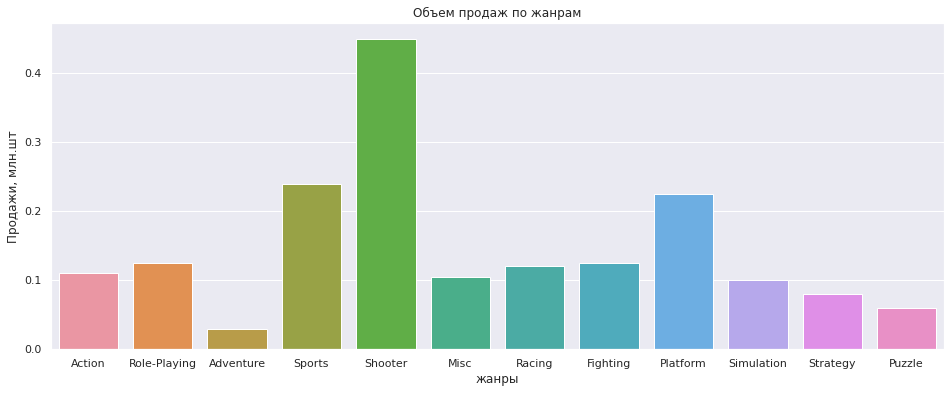

In [40]:
sns.set(rc={'figure.figsize':(16,6)})  
sns.barplot(data = df_genre, x="genre", y=('count', 'total_sales'))
plt.title('Количество игр по жанрам')
plt.xlabel('жанры')
plt.ylabel('Кол-во игр')
plt.show()
sns.barplot(data = df_genre, x="genre", y=(  'sum', 'total_sales'))
plt.title('Объем продаж по жанрам')
plt.xlabel('жанры')
plt.ylabel('Продажи, млн.шт')
plt.show()
sns.barplot(data = df_genre, x="genre", y=(  'median', 'total_sales'))
plt.title('Объем продаж по жанрам')
plt.xlabel('жанры')
plt.ylabel('Продажи, млн.шт')
plt.show()

На рынок выходит много игр с жанром Action, этот же жанр и больше всего покупают, но если посмотреть на медиану продаж каждой игры, видим, что жанр Action только седьмой "экшн делает продажи только за счет большего количества игр и большого количества бестселлеров". На втором месте по продажам жанр Shooter. По распределению медиан видим, что лидером являеться жанр Shooter. В среднем каждая игра этого жанра продаеться 0,45 мл. раз. Будет более выгоднее закупить больше шетеров, так как они принесут больший доход.

При исследовании данных мы рассмотрели продажи игр взависиомти по годам, определили среднюю  продолжнительность жизни платформы,  определили 3 потенциально прибыльные платформы, рассмотрели их корреляцию с рейтингом пользователей и экспертов. Рассмотрели продажи игр в зависимости от жанра. Обобщив результаты можем сказать, что потенциально прибыльные игры должны быть на платформах - XOne, PS4, 3DS, с жанром Action, Sports и Misc с любыми рейтингами пользователей или экспертов. Мы определили общий портрет игры с наибольшими продажами. Теперь определим портрет пользователя для каждого региона.

###  Составим портрет пользователя каждого региона

In [41]:
# Группировка данных ТОП5 платформ по продажам в разрезе рынков
na_platform = df[df.year_of_release > 2012].groupby('platform')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
eu_platform = df[df.year_of_release > 2012].groupby('platform')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
jp_platform = df[df.year_of_release > 2012].groupby('platform')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

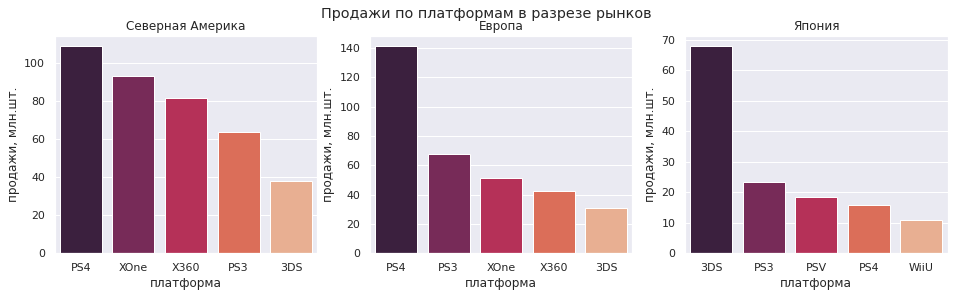

In [42]:
# График продаж по платформам в разрезе рынков
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Продажи по платформам в разрезе рынков')
sns.barplot(y='na_sales', x='platform', data=na_platform, ax=ax[0], palette='rocket')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('продажи, млн.шт.')
ax[0].set_xlabel('платформа')
sns.barplot(y='eu_sales', x='platform', data=eu_platform, ax=ax[1], palette='rocket')
ax[1].set_title('Европа')
ax[1].set_ylabel('продажи, млн.шт.')
ax[1].set_xlabel('платформа')
sns.barplot(y='jp_sales', x='platform', data=jp_platform, ax=ax[2], palette='rocket')
ax[2].set_title('Япония')
ax[2].set_ylabel('продажи, млн.шт.')
ax[2].set_xlabel('платформа')
plt.show()

В Северной Америке и в Европе лидер - PS4, а в Японии - мобильный 3DS, Япония - последний оплот компании Nintendo, 3DS и WiiU в сумме занимают 76% местного рынка. XOne от Microsoft второй в Северной Америке, в Японии его доля - статистическая погрешность. В Европе кроме лидирущего с большим отрывом PS4 остальные платформы показывают почти одинаковые цифры.

In [43]:
# Группировка данных ТОП5 жанров по продажам в разрезе рынков
na_genres = df[df.year_of_release > 2012].groupby('genre')['na_sales'].agg(na_sales='sum').nlargest(5, 'na_sales').reset_index()
eu_genres = df[df.year_of_release > 2012].groupby('genre')['eu_sales'].agg(eu_sales='sum').nlargest(5, 'eu_sales').reset_index()
jp_genres = df[df.year_of_release > 2012].groupby('genre')['jp_sales'].agg(jp_sales='sum').nlargest(5, 'jp_sales').reset_index()

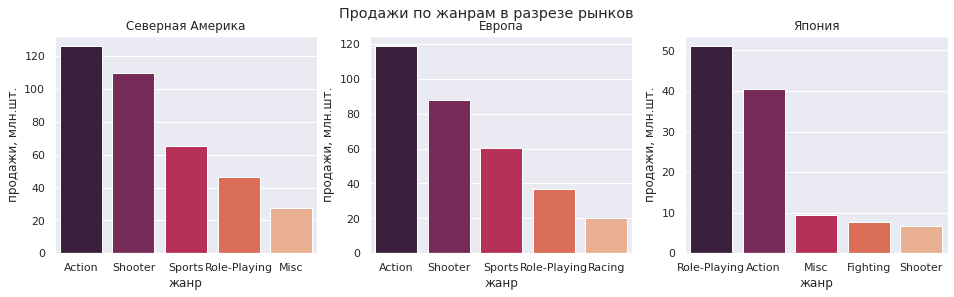

In [44]:
# График продаж по жанрам в разрезе рынков
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Продажи по жанрам в разрезе рынков')
sns.barplot(y='na_sales', x='genre', data=na_genres, ax=ax[0], palette='rocket')
ax[0].set_title('Северная Америка')
ax[0].set_ylabel('продажи, млн.шт.')
ax[0].set_xlabel('жанр')
sns.barplot(y='eu_sales', x='genre', data=eu_genres, ax=ax[1], palette='rocket')
ax[1].set_title('Европа')
ax[1].set_ylabel('продажи, млн.шт.')
ax[1].set_xlabel('жанр')
sns.barplot(y='jp_sales', x='genre', data=jp_genres, ax=ax[2], palette='rocket')
ax[2].set_title('Япония')
ax[2].set_ylabel('продажи, млн.шт.')
ax[2].set_xlabel('жанр')
plt.show()

В Северной Америке и в Европе больше всего продаются экшены, затем шутеры, потом ролевые игры. В Японии совершенно другой лидер - жанр ролевых игр, экшены идут с большим отрывом вторыми, а вот шутеры даже не попадают в ТОП5

### Влияние рейтинга ESRB на продажи по регионам

In [45]:
# Группировка данных ТОП5 жанров по рейтинге в разрезе рынков
na_rating = df[df.year_of_release > 2012].groupby('rating')['na_sales'].agg(na_sales='sum').reset_index()
eu_rating = df[df.year_of_release > 2012].groupby('rating')['eu_sales'].agg(eu_sales='sum').reset_index()
jp_rating = df[df.year_of_release > 2012].groupby('rating')['jp_sales'].agg(jp_sales='sum').reset_index()


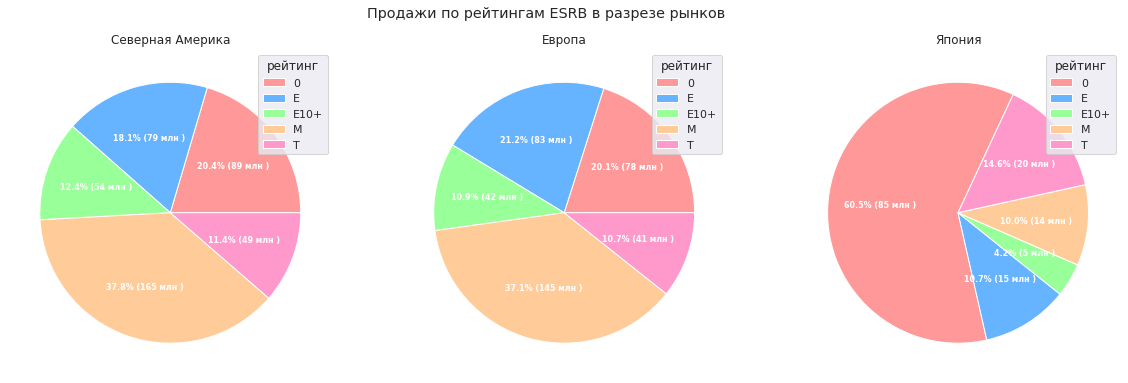

In [46]:
# Диаграмма продаж по рейтингам в разрезе рынков

fig, ax = plt.subplots(1,3, figsize=(20, 6))
fig.suptitle('Продажи по рейтингам ESRB в разрезе рынков')
data1, categories1 = na_rating['na_sales'], na_rating['rating']
data2, categories2 = eu_rating['eu_sales'], eu_rating['rating']
data3, categories3 = jp_rating['jp_sales'], jp_rating['rating']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ff99cc']
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} млн )".format(pct, absolute)
wedges, texts, autotexts = ax[0].pie(data1 ,autopct=lambda pct: func(pct, data1), textprops=dict(color="w"), colors=colors)
ax[0].set_title("Северная Америка")
ax[0].legend(wedges, categories1, title="рейтинг", loc="upper right")
plt.setp(autotexts, size=8, weight=850)
wedges, texts, autotexts = ax[1].pie(data2 ,autopct=lambda pct: func(pct, data2), textprops=dict(color="w"),colors=colors)
ax[1].set_title("Европа")
ax[1].legend(wedges, categories2, title="рейтинг", loc="upper right")
plt.setp(autotexts, size=8, weight=850)
wedges, texts, autotexts = ax[2].pie(
    data3 ,autopct=lambda pct: func(pct, data3), startangle = 65, textprops=dict(color="w"),colors=colors)
ax[2].set_title("Япония")
ax[2].legend(wedges, categories3, title="рейтинг", loc="upper right")
plt.setp(autotexts, size=8, weight=850)
plt.show()    

<br>В Северной Америке и в Европе схожая картина продаж по рейтингу - треть игр имеют рейтинг "17+", пятая часть - рейтинг "для всех", четверть - "подростковые" рейтинги, у примерно четверти игр рейтинг отсутствует.
<br>В Японии рейтинг отсутствует более чем у половины игр, пятая часть имеет рейтинг "для всех", четверть - все остальные.

<br>Большое количество отсутствия рейтингов в Японии возможно объяснить наличием национальной рейтинговой организации, что справедливо и для Европы, где есть как общие так и национальные организации. Онлайн магазины тип Stream вообще могут не получать рейтинги, или пользоватся международной IARC для полностью цифровых продаж.

**Портрет пользователя определенного рынка:**

Пользователь из Северной Америки любит и покупает экшены в пяти случаях из ста, чуть меньше - шутеры. В основном у него игры с рейтингом "для всех" или "17+" В 50% случаях, для своей Play Station 4, немного меньше вероятность что у него XOne от Microsoft. Возможно довольно часто покупает игры онлайн, иначе сложно объяснить что в стране придумавшей рейтинги для игр, их нет у четверти релизов.

Пользователь из Европы однозначно почти в половине случаев выбирает игры для Play Station 4, XOne у него окажется с такой же вероятностью что и игровой ноутбук или мобильная 3DS - в 13-16 случаях из ста. В остальном его предпочтения такие же как у пользователя из Северной Америки - больше всего любит экшены, затем шутеры, в половине случаев с рейтингом " для всех" или "17+", цифровые покупки вероятны также как и в Америке.

Пользователи из Японии уникальны, как и их страна. Они не замечают и не притрагиваются к XOne от Microsoft, Свежий PS4 У японца можно встретиь в десяти случаях из ста. В отличии от старого доброго 3DS от Nintendo, игры для которой забирают 66% продаж в индустрии в последние годы. Японец не любит стрелялки-шутеры, они его почти не интересуют, зато ролевые игры у него на первом месте в 37 случаях из ста, единственное что роднит его в предпочтениях с американцем и европейцем - популяность жанра экшен - 25% от всех продаж. Значению рейтинга американской ESRB его заботит мало, его нет у более чем половины игр покупаемых в Японии. Свои приставки, свои игры и скорее всего свои рейтинги или онлайн покупки, японцы действительно отличаются от других игроманов. 

### Проверьте гипотезы

Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Применим Т-тест для подтверждения гипотезы о равенстве средних двух генеральных совокупностей. 
<br>**Первая гипотеза представленная для проверки - cредние пользовательские рейтинги платформ Xbox One и PC равны**

<br>Следовательно гипотезы можно сформулировать:

<br>**$Ho$**  - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
<br>**$H1$**  - cредние пользовательские рейтинги платформ Xbox One и PC различаются

Зададим p-value = 0.05.

In [47]:
# Формирование выборок
xone_user_score = df[df.year_of_release > 2012].query('platform == "XOne" and user_score != 0', engine='python')['user_score']
pc_user_score = df[df.year_of_release > 2012].query('platform == "PC" and user_score != 0', engine='python')['user_score']
print('Размер выборки XOne:',len(xone_user_score))
print('Размер выборки PC:',len(pc_user_score))

Размер выборки XOne: 182
Размер выборки PC: 158


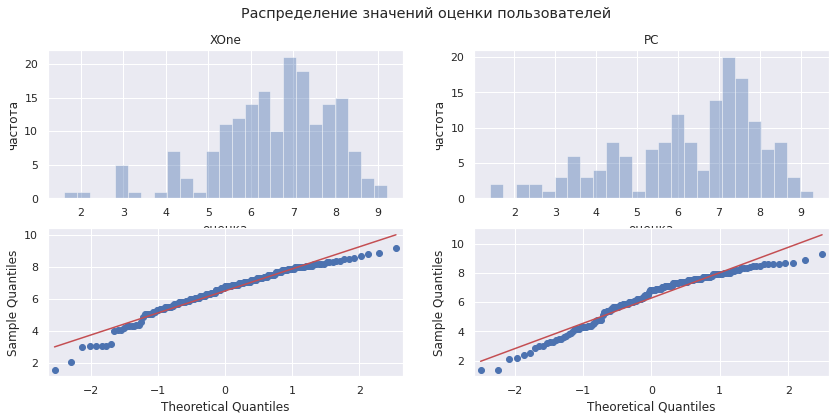

In [48]:
# Визуальная оценка распределения признаков в выборках
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
fig.suptitle('Распределение значений оценки пользователей')
sns.set_palette("rocket_r", 2, .85  ,color_codes=True)
sns.distplot(xone_user_score, ax=axes[0,0], kde=False, bins=25)
axes[0,0].set_title('XOne')
axes[0,0].set_xlabel('оценка')
axes[0,0].set_ylabel('частота')
sns.distplot(pc_user_score, ax=axes[0,1], kde=False, bins=25)
axes[0,1].set_title('PC')
axes[0,1].set_xlabel('оценка')
axes[0,1].set_ylabel('частота')
qqplot(xone_user_score, line='s', ax=axes[1,0])
qqplot(pc_user_score, line='s', ax=axes[1,1])
plt.show()

Выборки для проверки гиротезы были очищены от нулевых значений - замен пропусков, визуально, распределение можно считать условно нормальным, отклонения можно объяснить не очень большой выборкой 182 и 158 наблюдений

In [49]:
# Проведение t теста для выборок с разной дисперсией
alpha=0.05
results1 = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False) 
print('p-value:', results1.pvalue)

if (results1.pvalue < alpha):
    print("Необходимо отвергнуть нулевую гипотезу")
else:
    print("Не нужно отвергать нулевую гипотезу")

p-value: 0.16174359801784308
Не нужно отвергать нулевую гипотезу


<br>**Вторая гипотеза представленная для проверки - cредние пользовательские рейтинги жанров Action и Sports различаются**

<br>Следовательно гипотезы можно сформулировать:

<br>**$Ho$**  - ***cредние пользовательские рейтинги жанров Action и Sports одинаковы***
<br>**$H1$**  - ***cредние пользовательские рейтинги жанров Action и Sports различаются***

In [50]:
# Формирование выборок
action_user_score = df[df.year_of_release > 2012].query('genre == "Action" and user_score != 0', engine='python')['user_score']
sports_user_score = df[df.year_of_release > 2012].query('genre == "Sports" and user_score != 0', engine='python')['user_score']
print('Размер выборки Action:',len(action_user_score))
print('Размер выборки Sports:',len(sports_user_score))

Размер выборки Action: 392
Размер выборки Sports: 160


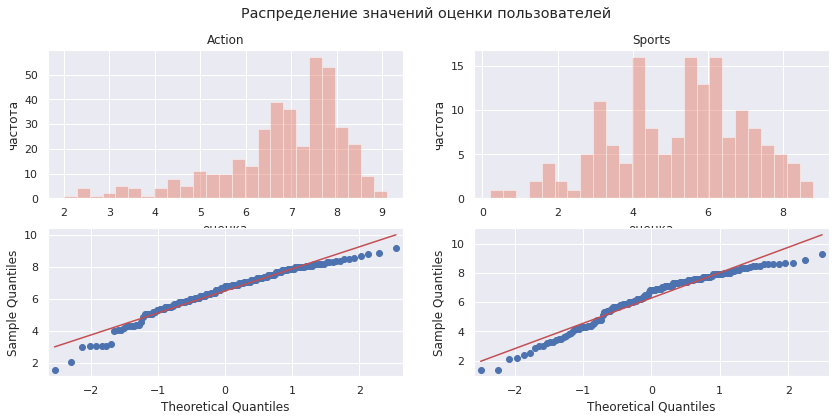

In [51]:
# Визуальная оценка распределения признаков в выборках
fig, axes = plt.subplots(2, 2, figsize=(14, 6))
fig.suptitle('Распределение значений оценки пользователей')
sns.set_palette("rocket_r", 2, .85  ,color_codes=True)
sns.distplot(action_user_score, ax=axes[0,0], kde=False, bins=25)
axes[0,0].set_title('Action')
axes[0,0].set_xlabel('оценка')
axes[0,0].set_ylabel('частота')
sns.distplot(sports_user_score, ax=axes[0,1], kde=False, bins=25)
axes[0,1].set_title('Sports')
axes[0,1].set_xlabel('оценка')
axes[0,1].set_ylabel('частота')
qqplot(xone_user_score, line='s', ax=axes[1,0])
qqplot(pc_user_score, line='s', ax=axes[1,1])
plt.show()

In [52]:
# Проведение t теста для выборок с разной дисперсией
alpha=0.05
results1 = st.ttest_ind(action_user_score, sports_user_score, equal_var=False) 
print('p-value:', results1.pvalue)

if (results1.pvalue < alpha):
    print("Необходимо отвергнуть нулевую гипотезу")
else:
    print("Не нужно отвергать нулевую гипотезу")

p-value: 1.3883444596405356e-20
Необходимо отвергнуть нулевую гипотезу


<br>**Результат проверки гипотез показал:**

<br>**Оснований отвергнуть гипотезу о равенстве средних значений оценок пользователей платформ XOne и PC нет.**
<br>**Есть статистически значимые различия между средними значениями оценок пользователей жанров Action и Sports.**

## Общий вывод

**Общий вывод:**

<br>Исторически "золотой век"(до 1400 релизов в год) как для мобильных так и для стационарных игровых платформ, если судить по количеству релизов закончился в 2010 году, можно предположить что появление и развитие смартфонов сыграло определяющую роль. После падения, количество релизов стабилизировалось с 2012 года около уровня 600 релизов, в настоящем рынок игр для игровых платформ - отдельная ниша. В среднем платформы существуют около 8 лет, после чего либо исчезают с рынка либо заменяются следующим поколением. Так, актуальный период для оценки рынка и перспектив в динамике - 4 года. За последние годы можно назвать нишевых лидеров - Sony и Microsoft, чьи платформы последнего поколения **Sony Playstation 4 и Microdoft XOne** в топе по штучным продажам игр *(244 и 133 млн шт. соответственно)*, причем с 2014 года уверенно лидирует PS4. 3DS хотя формально вторая (179 млн.шт) но уже не в активной фазе. Между продажами и пользовательскими оценками нет взаимосвязи, связь с оценками критиков присутствует умеренная, это справедливо для лидеров, для остальных такие оценки имеюь слабую взаимосвязь.

<br>Рекомендации для ассортиментной матрицы магазина компьютерных игр в 2017 году можно обозначить следующим образом:

<br>Для рынка **Северной Америки**, самая перспективная платформа **PS4**, затем **XOne** *(доля рынка - 31% и 28%)*, должны быть широко представлены самые популярные жанры для этого рынка - **Action** и **Shooter** *(доля рынка 27% и 22%)*, далее по убыванию - RPG, Sports, Platform, в основном , более чем в половине случаев с рейтингами M и T, четверть - с подростковыми рейтингами.

<br>Для рынка **Европы**, большую часть ассортимента должны составлять игры для **PS4** и **XOne** *(доля рынка 28% и 20%)* и и WiiU и остальные - в равных долях, самые популярны жанры - аналогично ассортименту для Северной Америки, рекомендации по рейтингам - также аналогично американским. 

<br>Для рынка **Японии**, по крайней мере на ближайший год все еще актуальны игры для мобильной приставки от **Nintendo 3DS** *(доля рынка 66%)*, из-за хоть и имеющей тенденцию к снижению, но все еще большой популярности, однако игры для современныех **PS4** *(9%)* и WiiU*(10%)* должны быть представлены, Основной перспективный жанр - **RPG** *(доля рынка 37%)*, затем **Action** *(23%)*, далее смешанные жанры, Simulation и Platform - в  равных пропорциях. Самый частотный рейтинг - "для всех", возможно необходимы рейтинги от национальной ассоциации.

<br>Общей рекомендацией для всех рынков может являтся наличие в ассортименте игр с хорошими оценками критиков, для самых перспективных платформ, возможно - рейтинги для цифровых продаж от онлайн ассоциаций. Также можно учесть что игры для PC - небольшая по объему но стабильная ниша, многие игры для XOne выходят также для PC, в силу доминирования на рынке PC софта Microsoft. C большой вероятностью средние пользовательские отзывы для для этих платформ одинаковы, что может давать синергию в продажах и варьиативность ассортимента. Также с небходимо отметить что пользователи более охотно дают хорошие оценки самому популярному жанру Action чем например жанру Sports. В целом для жанра Action необходима широта ассортимента, для Shooter - наличие популярных бестселлеров.